In [2]:
import arcpy
import psycopg2
from psycopg2 import sql

In [4]:
#create array of list of points
star_points = arcpy.Array([arcpy.Point(5,10), arcpy.Point(6,6), arcpy.Point(10,6), 
                           arcpy.Point(7,4), arcpy.Point(8,0), arcpy.Point(5,3),
                           arcpy.Point(2,0), arcpy.Point(3,4), arcpy.Point(0,6),
                           arcpy.Point(4,6), arcpy.Point(5,10)])

In [5]:
#create polygon from array
star_polygon = arcpy.Polygon(star_points)

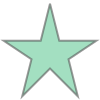

In [6]:
#testing that it looks like a proper star
star_polygon

In [7]:
#convert to WKT
star_WKT = star_polygon.WKT

In [8]:
#connect to my DB
schiller_database = psycopg2.connect(host = '34.27.119.90',
                    database = 'lab0',
                    user = 'postgres',
                    password = '')

In [9]:
#create cursor
cursor = schiller_database.cursor()

#insert statement
insert_stmt = "INSERT INTO mytable (geom) VALUES (ST_GeomFromText('{}', 4326))".format(star_WKT)
cursor.execute(insert_stmt)
schiller_database.commit()

In [10]:
#close the cursor and database connection
cursor.close()
schiller_database.close()